<a href="https://colab.research.google.com/github/Aldbow/Student-Focus-Classification-CNN/blob/main/Student_Focus_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import Callback
from keras.callbacks import EarlyStopping

import glob
from sklearn.model_selection import train_test_split

In [ ]:
# Ekstrak dataset dari rar

!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Pendeteksi Emosi Wajah/Data Uji.rar")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 5.7 MB/s 
patool: Extracting /content/drive/MyDrive/Pendeteksi Emosi Wajah/Data Uji.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Pendeteksi Emosi Wajah/Data Uji.rar"
patool:     with cwd='./Unpack_72tegvlc'
patool: ... /content/drive/MyDrive/Pendeteksi Emosi Wajah/Data Uji.rar extracted to `Data Uji' (multiple files in root).


'Data Uji'

In [ ]:
# Generator data

train_dir = '/content/Data Uji/Training'
val_dir = '/content/Data Uji/Validation'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    #shuffle=False
)

test_datagenerator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    #batch_size=10,
    batch_size=32,
    class_mode='binary',
    #shuffle=True,
    shuffle=False
)

Found 840 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
# Melihat kelas pada dataset

train_datagenerator.class_indices

{'Data Puas': 0, 'Data Tidak Puas': 1}

In [ ]:
# Model Layer Conv2D Layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D((2,2),2),
    tf.keras.layers.Dropout(0.5, name='dropout_1'),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),
    tf.keras.layers.Dropout(0.5, name='dropout_2'),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),
    tf.keras.layers.Dropout(0.5, name='dropout_3'),

    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),
    tf.keras.layers.Dropout(0.5, name='dropout_4'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Melihat summary model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 64)        0

In [ ]:
# Clear session jika bertujuan untuk training ulang model

tf.keras.backend.clear_session

<function keras.backend.clear_session>

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=0.001), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Fungsi callback

DESIRED_ACCURACY = 0.85

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('acc') is not None and logs.get('acc') >= DESIRED_ACCURACY) :
            print('\nReached 99.9% accuracy so cancelling training!')
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Training model

history = model.fit_generator(
          train_datagenerator,
          epochs=40,
          validation_data = test_datagenerator,
          callbacks = [callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/40
27/27 [==============================] - 38s 939ms/step - loss: 0.9185 - accuracy: 0.4929 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/40
27/27 [==============================] - 25s 933ms/step - loss: 0.6884 - accuracy: 0.5690 - val_loss: 0.6907 - val_accuracy: 0.6731
Epoch 3/40
27/27 [==============================] - 26s 970ms/step - loss: 0.6812 - accuracy: 0.5762 - val_loss: 0.6847 - val_accuracy: 0.5269
Epoch 4/40
27/27 [==============================] - 25s 924ms/step - loss: 0.6668 - accuracy: 0.6000 - val_loss: 0.6806 - val_accuracy: 0.6462
Epoch 5/40
27/27 [==============================] - 25s 932ms/step - loss: 0.6368 - accuracy: 0.6250 - val_loss: 0.6808 - val_accuracy: 0.5385
Epoch 6/40
27/27 [==============================] - 25s 928ms/step - loss: 0.6507 - accuracy: 0.6143 - val_loss: 0.6779 - val_accuracy: 0.5308
Epoch 7/40
27/27 [==============================] - 26s 970ms/step - loss: 0.6175 - accuracy: 0.6536 - val_loss: 0.6599 - val_accuracy: 0.6885

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


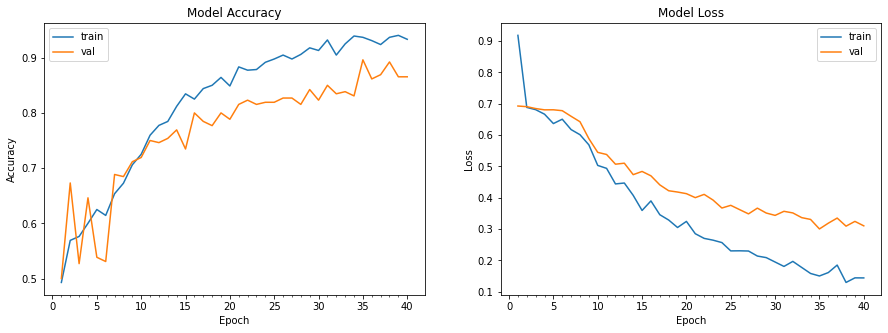

In [ ]:
# plot akurasi dan kurva kerugian
def plot_model_history(model_history):
    """
    Kurva Akurasi dan Kegagalan Plot dengan model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # meringkas riwayat akurasi
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # meringkas riwayat kegagalan
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

plot_model_history(history)

In [ ]:
# Menyimpan weights kedalam file

model.save('model_face_emotion.h5')

In [ ]:
# Menggunakan model yang telah di save

from keras.models import load_model
emotion_model = load_model('/content/model_face_emotion.h5')

In [ ]:
# Upload file untuk klasifikasi

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(128, 128))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = emotion_model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Puas")
  else:
    print(fn + " is a Tidak Puas")
  #predicted_indices=np.argmax(emotion_model.predict(images))
  #print(predicted_indices)
  #labels = (train_datagenerator.class_indices)
  #labels = dict((v,k) for k,v in labels.items())
  #print(labels)
  #predictions = [labels[k] for k in predicted_indices]
  #print(labels[predicted_indices])
  plt.imshow(img)
  plt.show()